In [96]:
install.packages('formattable', repos='http://cran.us.r-project.org')

package 'formattable' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Risin\AppData\Local\Temp\RtmpOYPDIr\downloaded_packages


In [97]:
library('tidyverse')
library('formattable')

Warning message:
"package 'formattable' was built under R version 3.4.4"

In [76]:
casper <- read.csv(file="XLS_takehome_NA.csv", header=TRUE, sep=",",stringsAsFactors=FALSE)

In [77]:
glimpse(casper)

Observations: 213
Variables: 4
$ dateordered  <chr> "12/31/2016", "12/31/2016", "12/30/2016", "12/29/2016"...
$ datereturned <chr> "1/24/2017", "", "", "", "12/29/2016", "", "1/28/2017"...
$ orderstatus  <chr> "returned", "complete", "complete", "complete", "retur...
$ orders       <int> 1, 8, 14, 14, 1, 23, 1, 1, 1, 1, 13, 12, 8, 1, 1, 1, 4...


In [78]:
casper$dateordered <- as.Date(casper$dateordered, "%m/%d/%Y")
casper$datereturned <- as.Date(casper$datereturned, "%m/%d/%Y")

In [79]:
casper$monthOrdered <- factor(format(casper$dateordered, "%m"), ordered = TRUE)

In [86]:
glimpse(casper)

Observations: 213
Variables: 5
$ dateordered  <date> 2016-12-31, 2016-12-31, 2016-12-30, 2016-12-29, 2016-...
$ datereturned <date> 2017-01-24, NA, NA, NA, 2016-12-29, NA, 2017-01-28, 2...
$ orderstatus  <chr> "returned", "complete", "complete", "complete", "retur...
$ orders       <int> 1, 8, 14, 14, 1, 23, 1, 1, 1, 1, 13, 12, 8, 1, 1, 1, 4...
$ monthOrdered <ord> 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12...


In [88]:
levels(casper$monthOrdered) <- c('Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [100]:
casperTotal <- casper %>%
    group_by(monthOrdered) %>%
    summarise(totalOrders = sum(orders),
              returnOrders = sum(orders[orderstatus == 'returned']),
              completeOrders = sum(orders[orderstatus == 'complete']),
              returnRate = percent(returnOrders / totalOrders, digits = 2))

In [101]:
casperTotal

monthOrdered,totalOrders,returnOrders,completeOrders,returnRate
Aug,149,10,139,6.71%
Sep,143,9,134,6.29%
Oct,180,10,170,5.56%
Nov,226,12,214,5.31%
Dec,395,19,376,4.81%


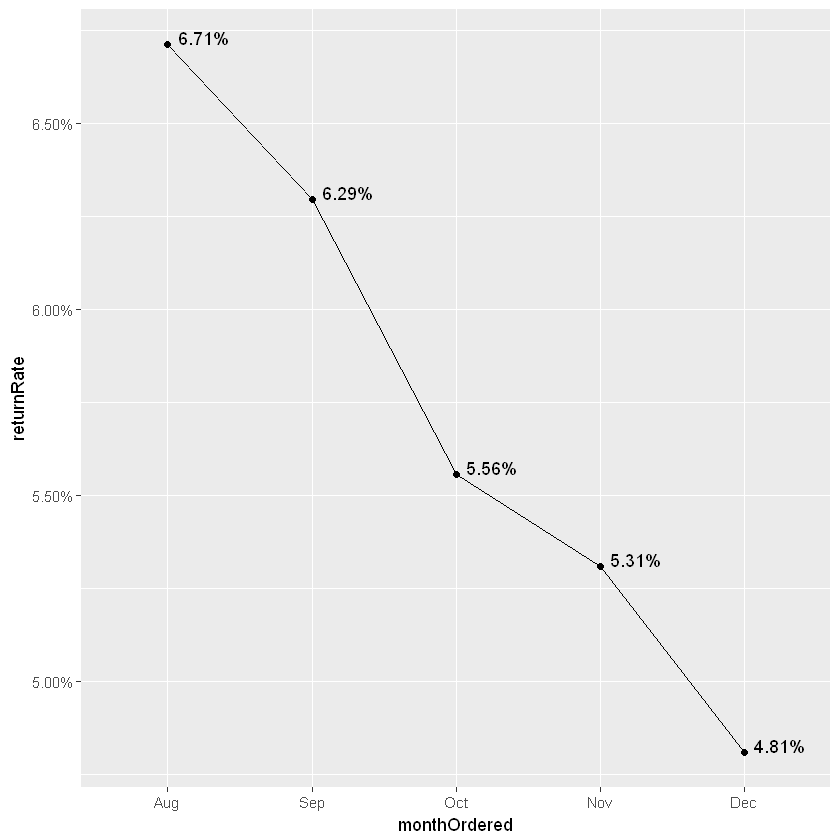

In [120]:
ggplot(data = casperTotal, aes(x = monthOrdered, y = returnRate, group = 1)) +
    geom_point() + geom_line() + geom_text(aes(label=returnRate),hjust=-.2, vjust=0) +
    scale_y_continuous(labels=percent)

Monthly return rate is trending down.